In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import time
import pandas as pd


# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble, ClassicalRegister, QuantumRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
import qiskit.quantum_info as qi 
from qiskit.extensions import UnitaryGate
from qiskit.extensions import HamiltonianGate
from qiskit.circuit.library import PhaseEstimation
from qiskit.algorithms import HamiltonianPhaseEstimation
 

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

# import basic plot tools
from qiskit.visualization import plot_histogram

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
H =   0.01*pd.read_csv('Ham_CO_O_Ru.csv').to_numpy()
print(H)
print(H.size)

[[ 4.06191168e-02 -6.94444444e-05  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -6.94444444e-05]
 [-6.94444444e-05 -2.37804724e+00 -6.94444444e-05  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -6.94444444e-05 -4.71381490e+00 -6.94444444e-05
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -6.94444444e-05 -1.92748719e+00
  -6.94444444e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00

In [3]:
U = HamiltonianGate(H,2*np.pi,label="CU") #
print(U)

Instruction(name='hamiltonian', num_qubits=4, num_clbits=0, params=[array([[ 4.06191168e-02+0.j, -6.94444444e-05+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        -6.94444444e-05+0.j],
       [-6.94444444e-05+0.j, -2.37804724e+00+0.j, -6.94444444e-05+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j, -6.94444444e-05+0.j, -4.71381490e+00+0.j,
        -6.94444444e-05+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e

In [4]:
#HamiltonianPhaseEstimation(U)

In [5]:
qpe = QuantumCircuit(12, 8)
#qpe.draw(scale=2)

In [6]:
for qubit in range(8):
    qpe.h(qubit)
#qpe.draw(scale=2)

In [7]:
qpe.x(10)
qpe.x(11)

In [8]:
CU = U.control(label="control")
print(CU)

Instruction(name='chamiltonian', num_qubits=5, num_clbits=0, params=[array([[ 4.06191168e-02+0.j, -6.94444444e-05+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
        -6.94444444e-05+0.j],
       [-6.94444444e-05+0.j, -2.37804724e+00+0.j, -6.94444444e-05+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000e+00+0.j],
       [ 0.00000000e+00+0.j, -6.94444444e-05+0.j, -4.71381490e+00+0.j,
        -6.94444444e-05+0.j,  0.00000000e+00+0.j,  0.00000000e+00+0.j,
         0.00000000

In [9]:
repetitions = 1
#CU = U#.to_gate().control(1)
for counting_qubit in range(6):
    for i in range(repetitions):
        qpe.append(CU,[counting_qubit,8,9,10,11])
        #qpe.cp(math.pi/4, counting_qubit, 3); # This is CU
    repetitions *= 2
#qpe.draw(scale=1.5)

In [10]:
#straight from the tutorial:
def qft_dagger(qc, n):
    """n-qubit QFTdagger the first n qubits in circ"""
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j)
        qc.h(j)

In [11]:
qpe.barrier()
# Apply inverse QFT
qft_dagger(qpe, 8)
# Measure
qpe.barrier()
for n in range(8):
    qpe.measure(n,n)

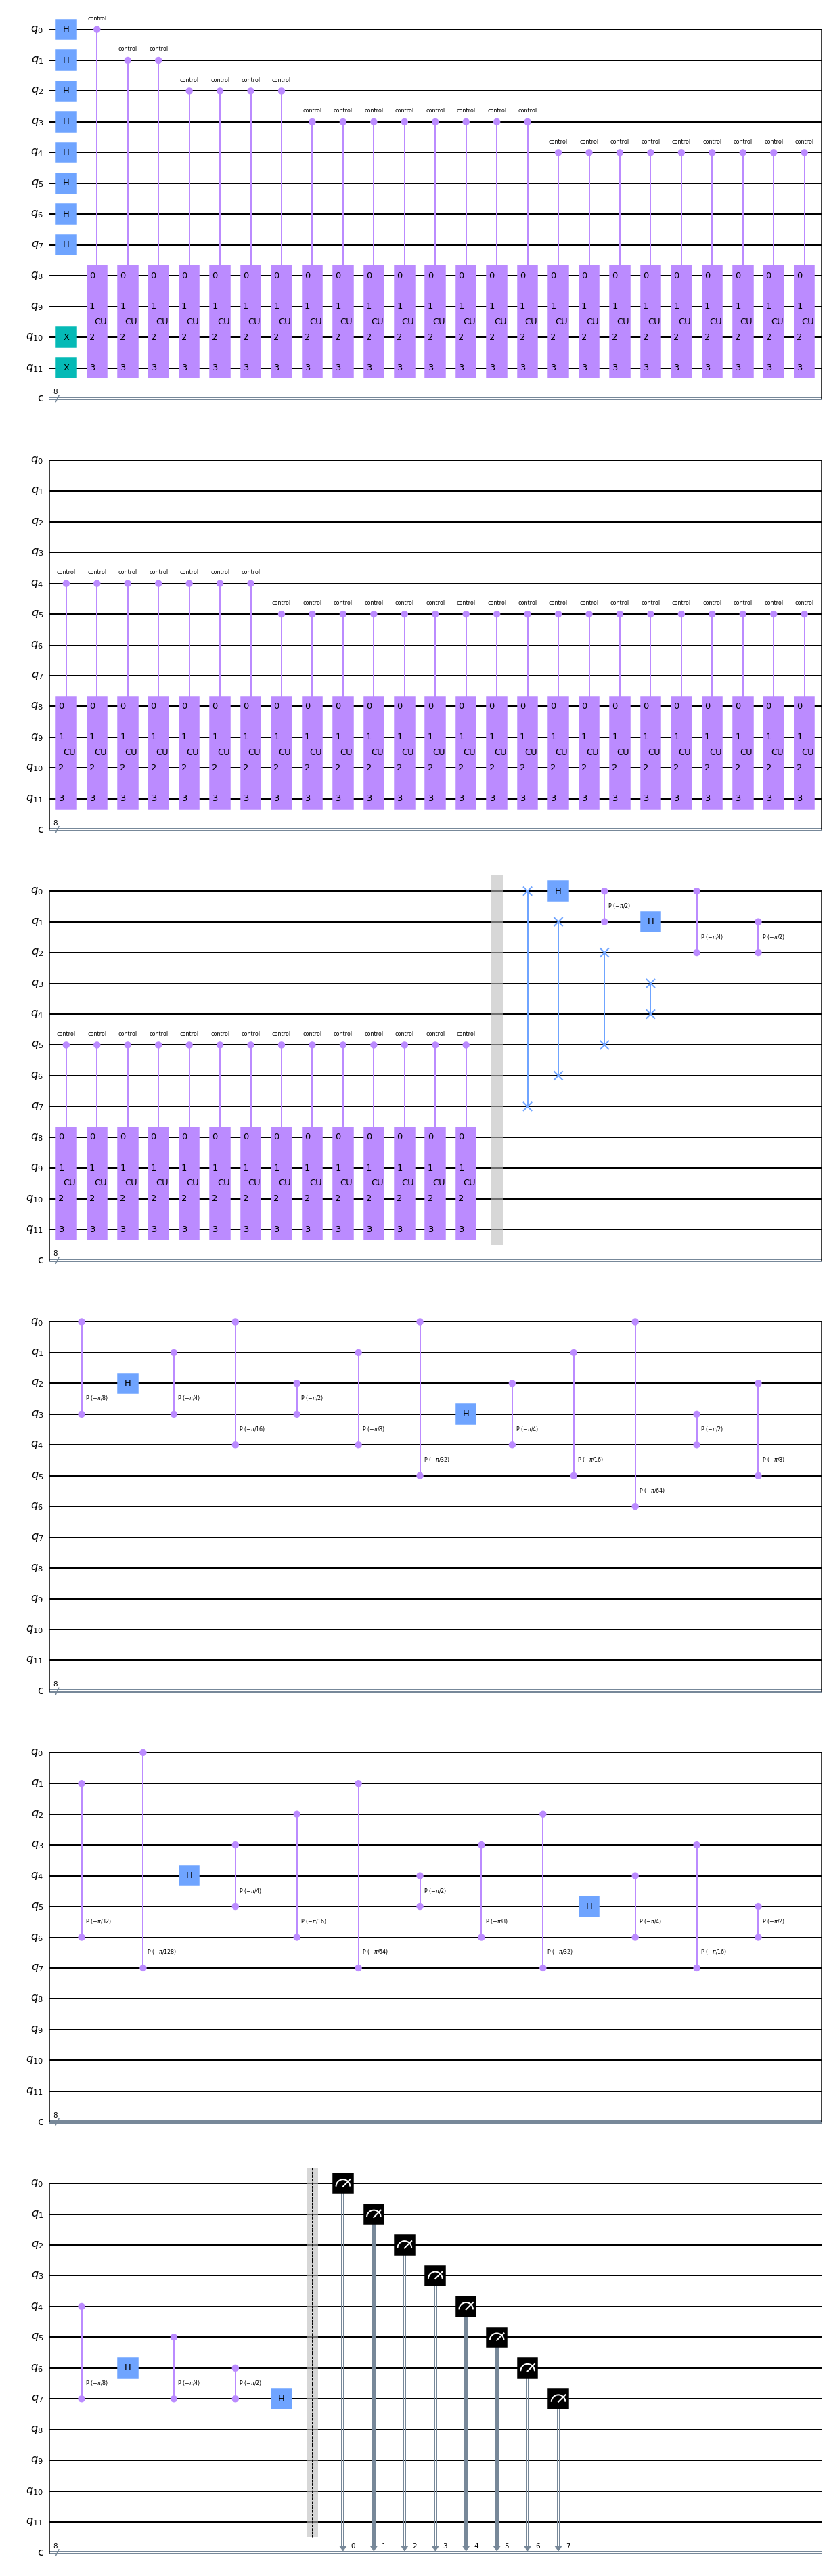

In [12]:
qpe.draw()

--- 4.854057788848877 seconds ---


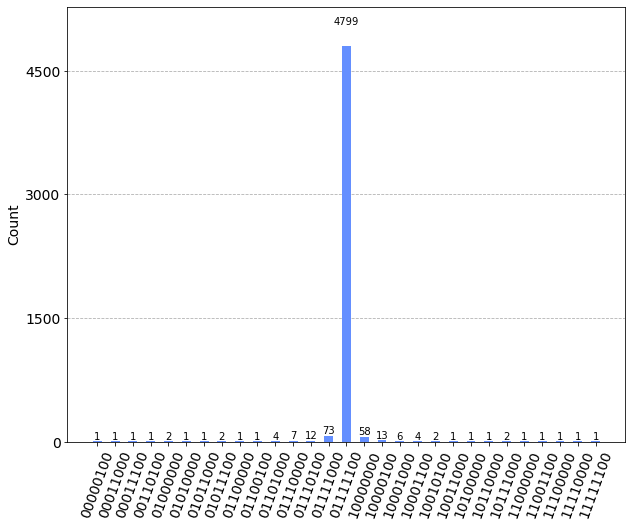

In [13]:
start_time = time.time()
aer_sim = Aer.get_backend('aer_simulator')
shots = 5000#2048
t_qpe = transpile(qpe, aer_sim)
qobj = assemble(t_qpe, shots=shots)
results = aer_sim.run(qobj).result()
answer = results.get_counts()
print("--- %s seconds ---" % (time.time() - start_time))
plot_histogram(answer,figsize=(10,8))


In [14]:
print(answer)

{'11111100': 1, '10011000': 1, '11001100': 1, '01010000': 1, '01101000': 4, '10001100': 4, '01100000': 1, '01011100': 2, '11100000': 1, '10010100': 2, '00011100': 1, '01110100': 12, '01111000': 73, '00000100': 1, '10111000': 2, '01110000': 7, '10000000': 58, '00110100': 1, '01011000': 1, '10001000': 6, '11000000': 1, '10100000': 1, '11110000': 1, '00011000': 1, '01111100': 4799, '01100100': 1, '10000100': 13, '10110000': 1, '01000000': 2}


In [15]:
print(max(answer, key=answer.get))

01111100


In [16]:
print(sorted(answer, key=answer.get, reverse=True)[0:8])

['01111100', '01111000', '10000000', '10000100', '01110100', '01110000', '10001000', '01101000']


In [17]:
myList = sorted(answer, key=answer.get, reverse=True)[0:8]
output_list = []
for element in myList:
    value = int(element,2)
    output_list.append(value)
print("The input list is:", myList)
print("The output list is:", sorted(output_list))

The input list is: ['01111100', '01111000', '10000000', '10000100', '01110100', '01110000', '10001000', '01101000']
The output list is: [104, 112, 116, 120, 124, 128, 132, 136]
